#  GeoPandas Workshop

**Review** : 

* Basic data structure in GeoPandas is a GeoDataFrame.\
* A GeoDataFrame is simply a regular Pandas data frame with the addition of a GeoSeries.\
* A series in Pandas is analagous to a field in a database or a column in a table or an attribute in a feature dataset.\
* A GeoSeries is a special type of column that contains vector geometry.\
* The geometries are handled internally as Shapely object

### 1 - Reading Shapefiles

In [5]:
#import 
%matplotlib inline
import os
from glob import glob
import geopandas as gpd
import matplotlib.pyplot as plt

# Inline method for crisp looking plots
%config InlineBackend.figure_format = 'svg'
#
# Larger scale for plots in notebooks
import seaborn as sns
sns.set_context('notebook')
#
# Enable multiple cell outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'


#### Cameroon Border

Shapefile for cameroon provinces can be find here: https://geodata.lib.utexas.edu/catalog/stanford-nn132pn3168

,ID_0,ISO,NAME_ENGLI,NAME_ISO,NAME_FAO,NAME_LOCAL,NAME_OBSOL,NAME_VARIA,NAME_NONLA,NAME_FRENC,...,CARICOM,EU,CAN,ACP,Landlocked,AOSIS,SIDS,Islands,LDC,geometry
0,41,CMR,Cameroon,CAMEROON,Cameroon,Cameroon,NaN,Cameroon|Kamerun|République du Cameroun,NaN,Cameroun,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,"MULTIPOLYGON (((11.37716 2.29688, 11.37720 2.2..."


<AxesSubplot: >

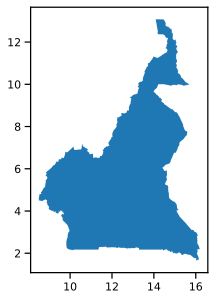

In [6]:
#Set file path 
path_file ='./dataset'
file_name = 'CMR_adm0.shp'

#read file into Geodataframe
cameroon_border = gpd.read_file(os.path.join(path_file, file_name)) # cameroon border

# get the first 5 rows with geodataframe.head() method
cameroon_border.head()
cameroon_border.plot()

#### Cameroon Provinces 

shapefile for cameroon provinces can be find here: https://geodata.lib.utexas.edu/catalog/stanford-db005yd3959

#### Cameroon Provinces 

In [3]:
#Set file path 
file_name = 'CMR_adm1.shp'

#read file into Geodataframe
cameroon_provinces = gpd.read_file(os.path.join(path_file, file_name))

# get the head
cameroon_provinces.head()

,ID_0,ISO,NAME_0,ID_1,NAME_1,HASC_1,CCN_1,CCA_1,TYPE_1,ENGTYPE_1,NL_NAME_1,VARNAME_1,geometry
0,41,CMR,Cameroon,1,Adamaoua,CM.AD,0,NaN,Région,Region,NaN,Adamoua|Adamaua|Adamawa,"POLYGON ((12.28961 8.17652, 12.28910 8.17356, ..."
1,41,CMR,Cameroon,2,Centre,CM.CE,0,NaN,Région,Region,NaN,Central,"POLYGON ((11.99259 6.26126, 11.99613 6.26115, ..."
2,41,CMR,Cameroon,3,Est,CM.ES,0,NaN,Région,Region,NaN,East,"POLYGON ((14.39409 6.06241, 14.39550 6.06004, ..."
3,41,CMR,Cameroon,4,Extrême-Nord,CM.EN,0,NaN,Région,Region,NaN,Extreme-North,"POLYGON ((14.08553 13.07739, 14.08884 13.07707..."
4,41,CMR,Cameroon,5,Littoral,CM.LT,0,NaN,Région,Region,NaN,Litoral,"POLYGON ((9.84270 5.33485, 9.84340 5.33423, 9...."


#### Cameroon Major Cities

In [5]:
#Set file path 
file_name = 'CM_Cities.shp'

#read file into Geodataframe
cameroon_cities = gpd.read_file(os.path.join(path_file, file_name))

# get the head
cameroon_cities.head()

,CITY_NAME,P_CAPITAL,D_CAPITAL,geometry
0,Makari,None,None,POINT (14.44455 12.55896)
1,Woulki,None,None,POINT (14.62733 12.47518)
2,Goulfey,None,None,POINT (14.90041 12.37827)
3,Fotokol,None,None,POINT (14.22419 12.37324)
4,Tilde Goulfey,None,None,POINT (14.69171 12.09509)


In [19]:
# Get Douala
douala = cameroon_cities[cameroon_cities['CITY_NAME'] == 'DOUALA']
print(douala)

    CITY_NAME P_CAPITAL D_CAPITAL                 geometry
175    DOUALA    DOUALA    DOUALA  POINT (9.70637 4.04749)


<hr/> 

### 2-Get spatial information

#### Cameroon Border

In [6]:
#get the coordinate reference system
print(cameroon_border.crs)

epsg:4326


In [7]:
#Get shape
cameroon_border.shape

(1, 68)

In [8]:
#Get the geometry type
cameroon_border.geom_type

0    MultiPolygon
dtype: object

In [9]:
#Get boundix box
cameroon_border.total_bounds

array([ 8.4994545 ,  1.6522671 , 16.19104576, 13.07739067])

#### Cameroon Provinces 

In [10]:
#get the coordinate reference system
print(cameroon_provinces.crs)

epsg:4326


In [11]:
#Get shape
cameroon_provinces.shape

(10, 13)

In [12]:
#Get the geometry type
cameroon_provinces.geom_type

0         Polygon
1         Polygon
2         Polygon
3         Polygon
4         Polygon
5         Polygon
6         Polygon
7         Polygon
8         Polygon
9    MultiPolygon
dtype: object

In [13]:
#Get boundig box
cameroon_provinces.total_bounds

array([ 8.4994545 ,  1.6522671 , 16.19104576, 13.07739067])

In [14]:
# Get bounds of each row
cameroon_provinces.bounds

,minx,miny,maxx,maxy
0,11.181338,5.972384,15.234099,8.187595
1,10.230590,3.104489,13.246945,6.261260
2,12.493128,1.652267,16.191046,6.062409
3,13.403122,9.934937,15.689525,13.077391
4,9.335801,3.260334,11.077747,5.334849
5,9.590784,5.703934,11.209311,7.162286
6,12.238751,7.015954,15.593646,10.261115
7,9.832662,4.881257,11.316862,6.264658
8,8.499454,3.907236,10.101245,6.530717
9,9.815081,2.141032,13.680087,3.682082


#### Cameroon Major Cities 

In [15]:
#get the coordinate reference system
print(cameroon_cities.crs)

epsg:4326


In [16]:
#Get the geometry type
cameroon_cities.geom_type

0      Point
1      Point
2      Point
3      Point
4      Point
       ...  
533    Point
534    Point
535    Point
536    Point
537    Point
Length: 538, dtype: object

<hr/> 

### 4 -Basic visualisation

<AxesSubplot:>

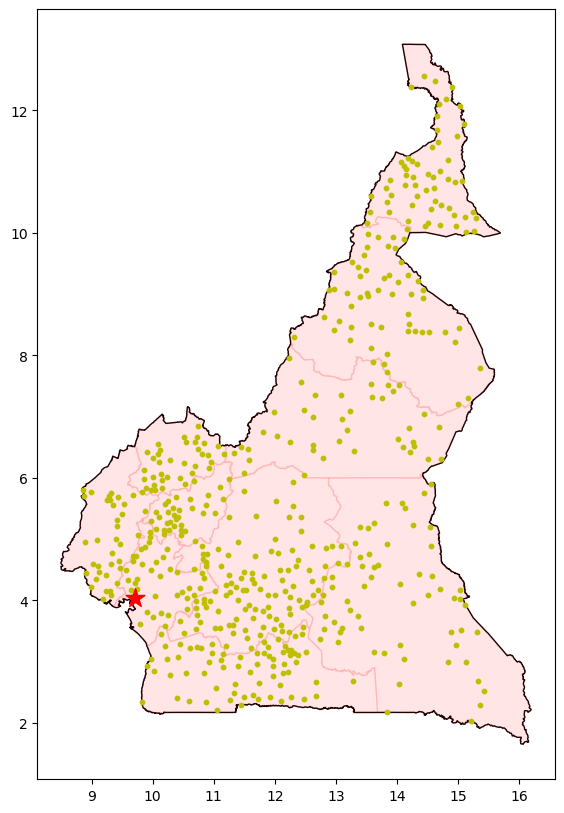

In [20]:
fig, ax = plt.subplots(figsize = [10,10])
cameroon_border.plot(ax=ax,
                    fc = 'white',
                    ec = 'k')
cameroon_provinces.plot(ax=ax,
                    fc = 'r',
                    alpha = 0.1,
                    ec = 'r')
cameroon_cities.plot(ax=ax,
                    markersize = 10,
                    facecolor = 'y')
douala.plot(ax=ax,
            markersize = 200,
            marker = "*",
            facecolor = 'red')

<hr/> 

### 4 -Interactive plot

In [17]:
cameroon_provinces.explore()

### 5. Geopandas Operations

##### Change CRS 

Link to the crs her: https://epsg.io/22832

In [21]:
cameroon_cities.to_crs(22832, inplace=True)
cameroon_border.to_crs(22832, inplace=True)
cameroon_provinces.to_crs(22832, inplace = True)
cameroon_cities.crs

<Derived Projected CRS: EPSG:22832>
Name: Douala / UTM zone 32N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Cameroon - onshore and offshore.
- bounds: (8.32, 1.65, 16.21, 13.09)
Coordinate Operation:
- name: UTM zone 32N
- method: Transverse Mercator
Datum: Douala
- Ellipsoid: Clarke 1880 (IGN)
- Prime Meridian: Greenwich

<AxesSubplot:>

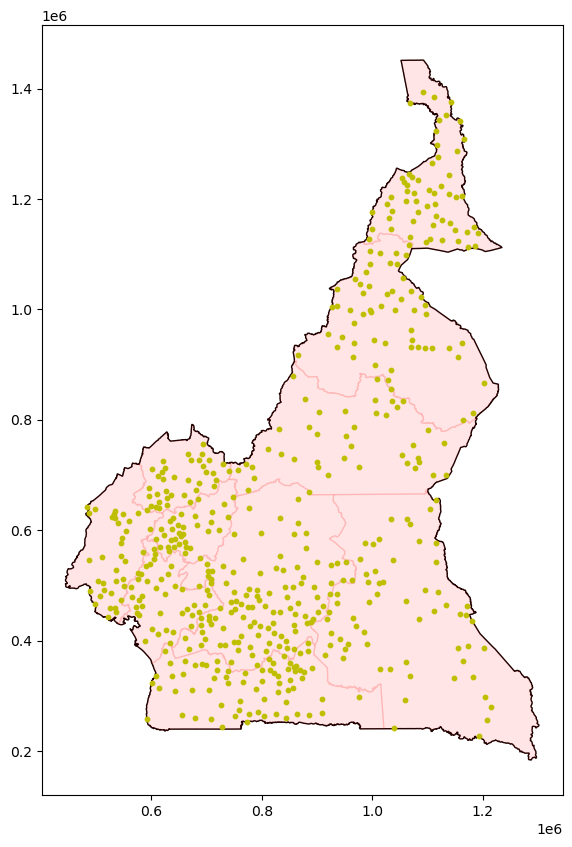

In [22]:
fig, ax = plt.subplots(figsize = [10,10])
cameroon_border.plot(ax=ax,
                    fc = 'white',
                    ec = 'k')
cameroon_provinces.plot(ax=ax,
                    fc = 'r',
                    alpha = 0.1,
                    ec = 'r')
cameroon_cities.plot(ax=ax,
                    markersize = 10,
                    facecolor = 'y')

#### Clipping in GeoPandas
There are two methods for clipping data in GeoPandas:
1. Clip Operator
2. Intersection Operator

In [23]:
adamaoua = cameroon_provinces[cameroon_provinces['NAME_1'] == 'Adamaoua']
adamaoua.explore()

<AxesSubplot:>

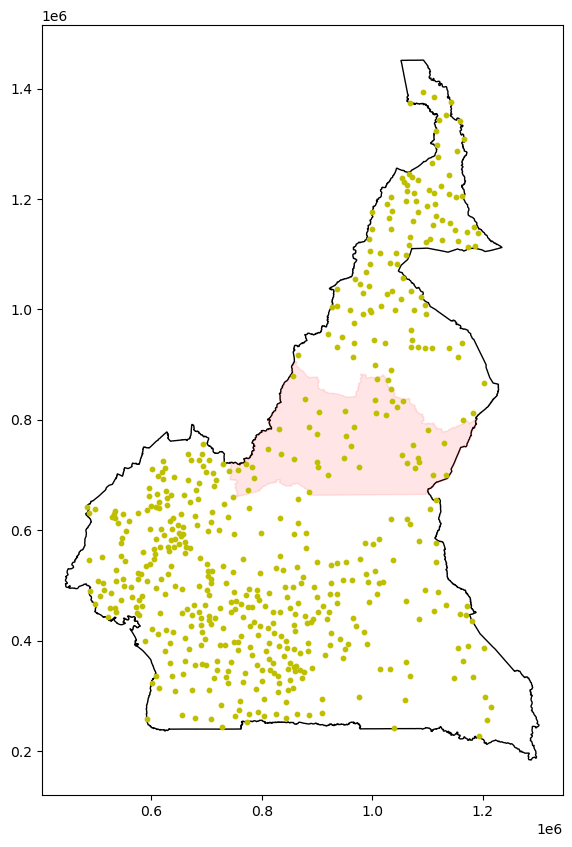

In [24]:
fig, ax = plt.subplots(figsize = [10,10])
cameroon_border.plot(ax=ax,
                    fc = 'white',
                    ec = 'k')
adamaoua.plot(ax=ax,
                    fc = 'r',
                    alpha = 0.1,
                    ec = 'r')
cameroon_cities.plot(ax=ax,
                    markersize = 10,
                    facecolor = 'y')

##### Clip Command

<AxesSubplot:>

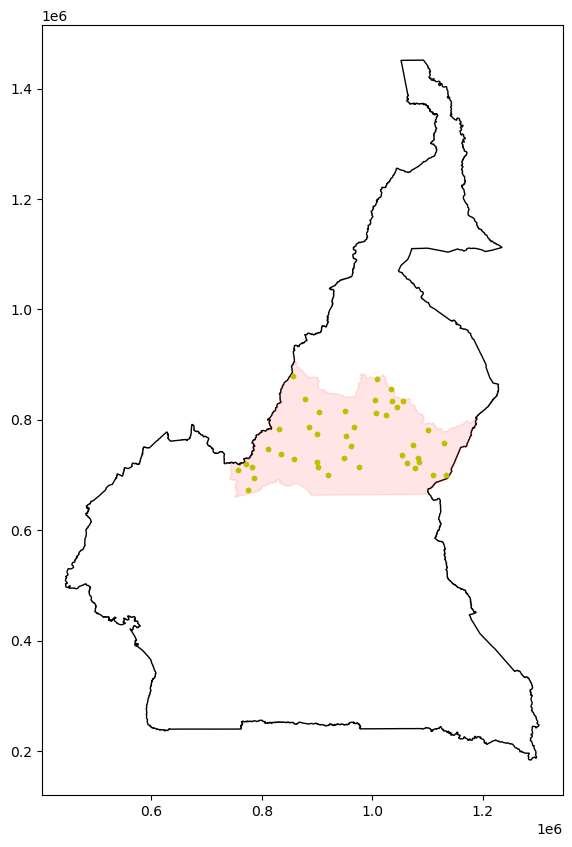

In [26]:
adamaoua_cities_v1 = gpd.clip(cameroon_cities, adamaoua)

# Visual check
fig, ax = plt.subplots(figsize = [10,10])
cameroon_border.plot(ax=ax,
                    fc = 'white',
                    ec = 'k')
adamaoua.plot(ax=ax,
                    fc = 'r',
                    alpha = 0.1,
                    ec = 'r')
adamaoua_cities_v1.plot(ax=ax,
                    markersize = 10,
                    facecolor = 'y')

##### Intersect/within Command 

First step let's create a polygon of  the Adamaoua using "unary_union"

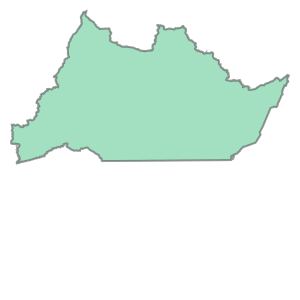

In [27]:
adamaoua_poly = adamaoua.unary_union
adamaoua_poly

<AxesSubplot:>

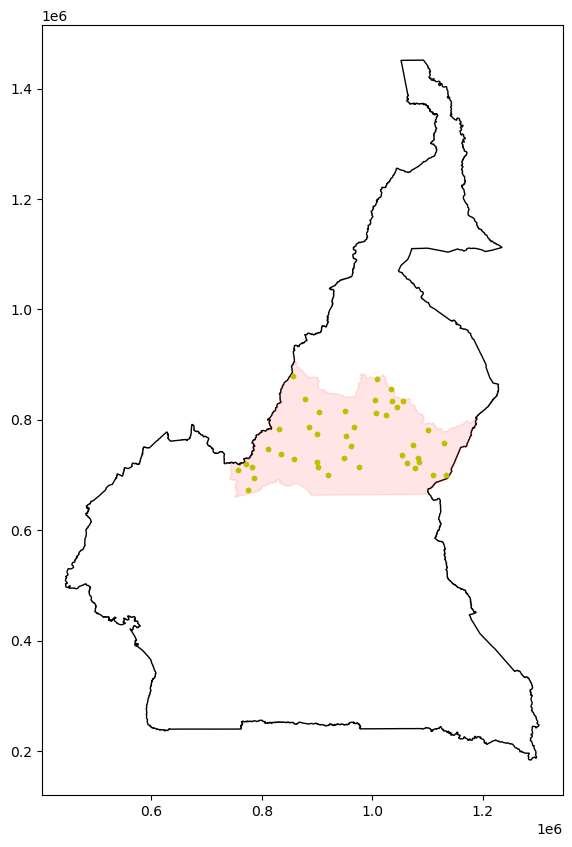

In [28]:
adamaoua_cities_v2 = cameroon_cities[cameroon_cities['geometry'].within(adamaoua_poly)]

# Visual Check
fig, ax = plt.subplots(figsize = [10,10])
cameroon_border.plot(ax=ax,
                    fc = 'white',
                    ec = 'k')
adamaoua.plot(ax=ax,
                    fc = 'r',
                    alpha = 0.1,
                    ec = 'r')
adamaoua_cities_v2.plot(ax=ax,
                    markersize = 10,
                    facecolor = 'y')

In [29]:
# Check if both methods are idetical
adamaoua_cities_v2.shape[0] == adamaoua_cities_v1.shape[0]

True

##### Spatial Join 

<AxesSubplot:>

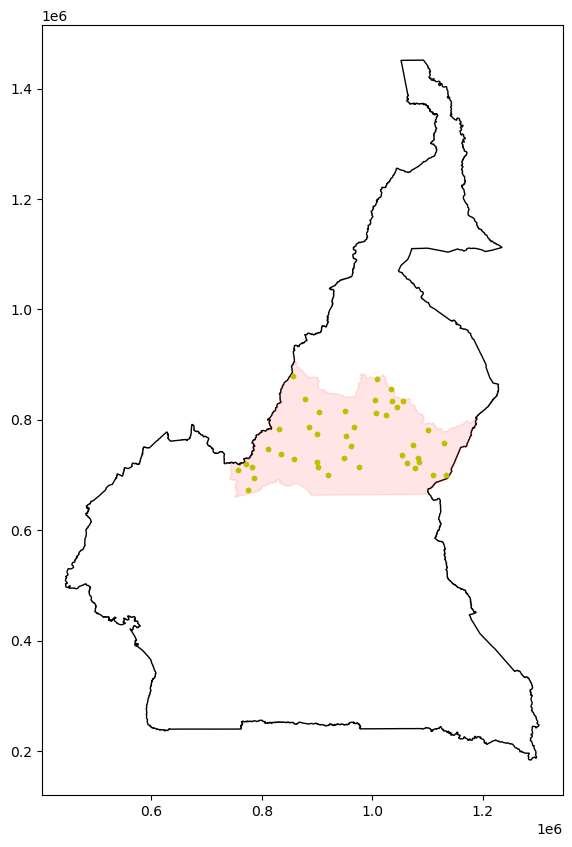

In [30]:
adamaoua_cities_v3 = cameroon_cities.sjoin(adamaoua, predicate="within")

# Visual Check
fig, ax = plt.subplots(figsize = [10,10])
cameroon_border.plot(ax=ax,
                    fc = 'white',
                    ec = 'k')
adamaoua.plot(ax=ax,
                    fc = 'r',
                    alpha = 0.1,
                    ec = 'r')
adamaoua_cities_v3.plot(ax=ax,
                    markersize = 10,
                    facecolor = 'y')

#### Buffer 

In [31]:
adamaoua['buffer'] = adamaoua['geometry'].buffer(20000) # based on crs, units are in meters --> 20 km = 20,000 m
adamaoua

/Users/dariaakhbari/opt/anaconda3/lib/python3.9/site-packages/geopandas/geodataframe.py:1443: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


,ID_0,ISO,NAME_0,ID_1,NAME_1,HASC_1,CCN_1,CCA_1,TYPE_1,ENGTYPE_1,NL_NAME_1,VARNAME_1,geometry,buffer
0,41,CMR,Cameroon,1,Adamaoua,CM.AD,0,None,Région,Region,None,Adamoua|Adamaua|Adamawa,"POLYGON ((862553.745 905211.942, 862500.762 90...","POLYGON ((721504.036 696319.907, 721530.921 69..."


<AxesSubplot:>

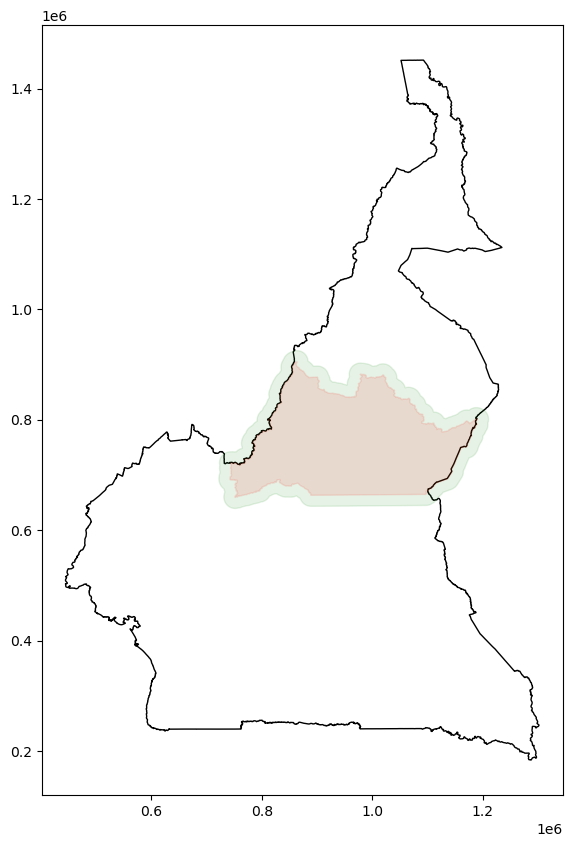

In [32]:
# Visual Check
fig, ax = plt.subplots(figsize = [10,10])
cameroon_border.plot(ax=ax,
                    fc = 'white',
                    ec = 'k')
adamaoua['buffer'].plot(ax=ax,
                    fc = 'g',
                    alpha = 0.1,
                    ec = 'g')
adamaoua.plot(ax=ax,
                    fc = 'r',
                    alpha = 0.1,
                    ec = 'r')

#### Dissolve (Aggregation)
In Geopandas, we have a method called dissolve that will allow dissolving by category and return a new GeoDataFrame that can optionally include some aggregate statistics from the polygons that were aggregated.

<AxesSubplot:>

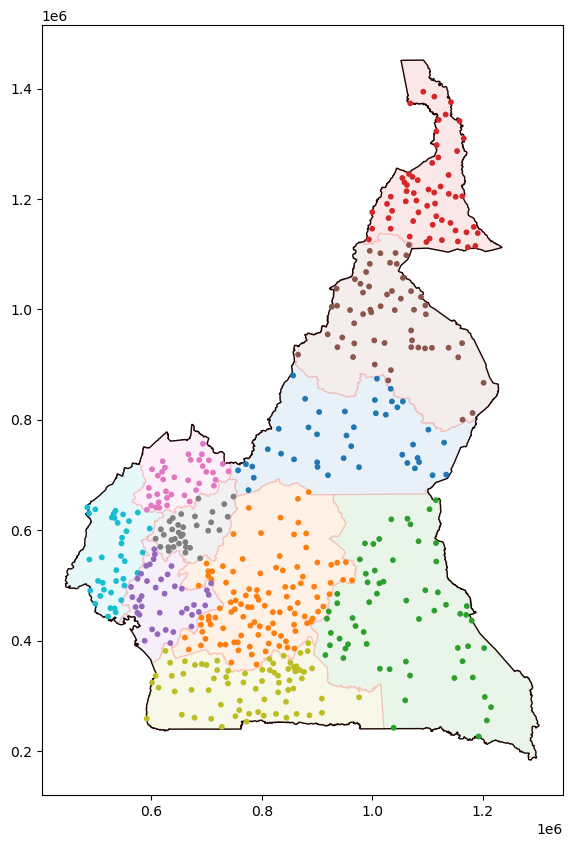

In [35]:
# Let's use spatial join to get provinces name for each city
cameroon_cities = cameroon_cities.sjoin(cameroon_provinces)
# Visual Check
fig, ax = plt.subplots(figsize = [10,10])
cameroon_border.plot(ax=ax,
                    fc = 'white',
                    ec = 'k')
cameroon_provinces.plot(column ='NAME_1',
                        ax=ax,
                    fc = 'r',
                    alpha = 0.1,
                    ec = 'r')
cameroon_cities.plot(column ='NAME_1',
                     ax=ax,
                    markersize = 10,
                    facecolor = 'y')

In [36]:
city_counts = cameroon_cities.dissolve(by = 'NAME_1', aggfunc='count')[['CITY_NAME']]
city_counts

,CITY_NAME
NAME_1,
Adamaoua,41
Centre,106
Est,61
Extrême-Nord,57
Littoral,40
Nord,55
Nord-Ouest,37
Ouest,34
Sud,70


#### Measurements

In [37]:
cameroon_provinces.crs

<Derived Projected CRS: EPSG:22832>
Name: Douala / UTM zone 32N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Cameroon - onshore and offshore.
- bounds: (8.32, 1.65, 16.21, 13.09)
Coordinate Operation:
- name: UTM zone 32N
- method: Transverse Mercator
Datum: Douala
- Ellipsoid: Clarke 1880 (IGN)
- Prime Meridian: Greenwich

##### Area 

In [38]:
# Get area
cameroon_provinces['area_sqkm'] = cameroon_provinces['geometry'].area/1e6
cameroon_provinces[['NAME_1', 'area_sqkm']]

,NAME_1,area_sqkm
0,Adamaoua,64275.239791
1,Centre,68913.918318
2,Est,109776.180812
3,Extrême-Nord,34577.584603
4,Littoral,20117.569794
5,Nord-Ouest,17450.721860
6,Nord,66797.184000
7,Ouest,13892.284693
8,Sud-Ouest,24901.593431
9,Sud,47345.432379


In [39]:
# Cameroon area using cameroon border
print(cameroon_border.area/1e6)

# Cameroon area using cameroon provinces
print(cameroon_provinces['area_sqkm'].sum())

0    468047.709683
dtype: float64
468047.70968266553


##### Perimeter 

In [40]:
# Get perimeter
cameroon_provinces['perimeter_km'] = cameroon_provinces['geometry'].length/1e3
cameroon_provinces[['NAME_1', 'area_sqkm','perimeter_km']]

,NAME_1,area_sqkm,perimeter_km
0,Adamaoua,64275.239791,1588.170012
1,Centre,68913.918318,1787.491638
2,Est,109776.180812,2036.521362
3,Extrême-Nord,34577.584603,1419.277567
4,Littoral,20117.569794,1217.696853
5,Nord-Ouest,17450.721860,750.859894
6,Nord,66797.184000,1541.788307
7,Ouest,13892.284693,767.915856
8,Sud-Ouest,24901.593431,1076.296860
9,Sud,47345.432379,1478.688294


##### Distance

In [41]:
# Get Douala
douala = cameroon_cities[cameroon_cities['CITY_NAME'] == 'DOUALA']
douala.crs

<Derived Projected CRS: EPSG:22832>
Name: Douala / UTM zone 32N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Cameroon - onshore and offshore.
- bounds: (8.32, 1.65, 16.21, 13.09)
Coordinate Operation:
- name: UTM zone 32N
- method: Transverse Mercator
Datum: Douala
- Ellipsoid: Clarke 1880 (IGN)
- Prime Meridian: Greenwich

In [42]:
# Get Point geometry for Douala
from shapely.geometry import Point
douala_pnt = Point(douala['geometry'].x, douala['geometry'].y)

In [46]:
# Get centeroid of each province
provinces_center = cameroon_provinces.centroid
provinces_center

0      POINT (958395.880 758403.758)
1      POINT (813064.508 516020.002)
2     POINT (1079547.820 421076.635)
3    POINT (1104818.869 1230206.698)
4      POINT (624039.319 470836.525)
5      POINT (651603.067 703858.933)
6     POINT (1044581.027 941318.709)
7      POINT (682978.783 608407.200)
8      POINT (532135.311 574470.248)
9      POINT (786362.584 304794.815)
dtype: geometry

In [47]:
cameroon_provinces['dist_douala_km'] = provinces_center.distance(douala_pnt)/1e3
cameroon_provinces[['NAME_1', 'area_sqkm','perimeter_km','dist_douala_km']]

,NAME_1,area_sqkm,perimeter_km,dist_douala_km
0,Adamaoua,64275.239791,1588.170012,491.051327
1,Centre,68913.918318,1787.491638,244.490223
2,Est,109776.180812,2036.521362,501.826674
3,Extrême-Nord,34577.584603,1419.277567,943.366467
4,Littoral,20117.569794,1217.696853,51.309933
5,Nord-Ouest,17450.721860,750.859894,266.728528
6,Nord,66797.184000,1541.788307,679.191495
7,Ouest,13892.284693,767.915856,192.009784
8,Sud-Ouest,24901.593431,1076.296860,135.262857
9,Sud,47345.432379,1478.688294,252.134064
